In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [29]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')
df['balcony'] = pd.to_numeric(df['balcony'], errors='coerce')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13073 non-null  float64
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.7+ KB


In [31]:
df['price_per_sqft'] = df['price']*100000 / df['total_sqft']
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,4250.000000


In [32]:
df.isnull().sum()

area_type            0
availability         0
location             1
size                16
society           5502
total_sqft         247
bath                73
balcony            609
price                0
price_per_sqft     247
dtype: int64

In [33]:
df.drop('society',axis=1,inplace=True)
df['balcony']=df['balcony'].fillna(1)

In [34]:
df.dropna(inplace=True)

In [35]:
df.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
price_per_sqft    0
dtype: int64

In [36]:
print(df['area_type'].unique())

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']


In [37]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['area_type', 'availability', 'location', 'size'], dtype='object')


In [38]:
avg_price_by_location = df.groupby('area_type')['price'].mean().reset_index()
print(avg_price_by_location)

              area_type       price
0        Built-up  Area  103.279150
1          Carpet  Area   93.789506
2            Plot  Area  209.714771
3  Super built-up  Area   92.734543


In [39]:
df1=df.copy()

In [40]:
df1.groupby('area_type')['price'].max()

area_type
Built-up  Area          2050.0
Carpet  Area             500.0
Plot  Area              3600.0
Super built-up  Area    2912.0
Name: price, dtype: float64

In [41]:
df1.groupby('size')['price'].max()

size
1 BHK          750.0
1 Bedroom      306.0
1 RK            52.0
10 BHK         525.0
10 Bedroom    3600.0
11 BHK         360.0
11 Bedroom     170.0
12 Bedroom     300.0
13 BHK         275.0
14 BHK         125.0
16 BHK         550.0
18 Bedroom     200.0
19 BHK         490.0
2 BHK          475.0
2 Bedroom      650.0
27 BHK         230.0
3 BHK         1015.0
3 Bedroom     2000.0
4 BHK         2912.0
4 Bedroom     2600.0
43 Bedroom     660.0
5 BHK         2700.0
5 Bedroom     2736.0
6 BHK         1000.0
6 Bedroom     2800.0
7 BHK         2200.0
7 Bedroom      972.0
8 BHK          310.0
8 Bedroom     1900.0
9 BHK          500.0
9 Bedroom     1200.0
Name: price, dtype: float64

In [42]:
df1.groupby('location')['price'].max()

location
 Anekal                  16.00
 Banaswadi               35.00
 Basavangudi             50.00
 Bhoganhalli             22.89
 Devarabeesana Halli    160.00
                         ...  
t.c palya               160.00
tc.palya                 78.00
vinayakanagar           200.00
white field,kadugodi    275.00
whitefiled               32.73
Name: price, Length: 1298, dtype: float64

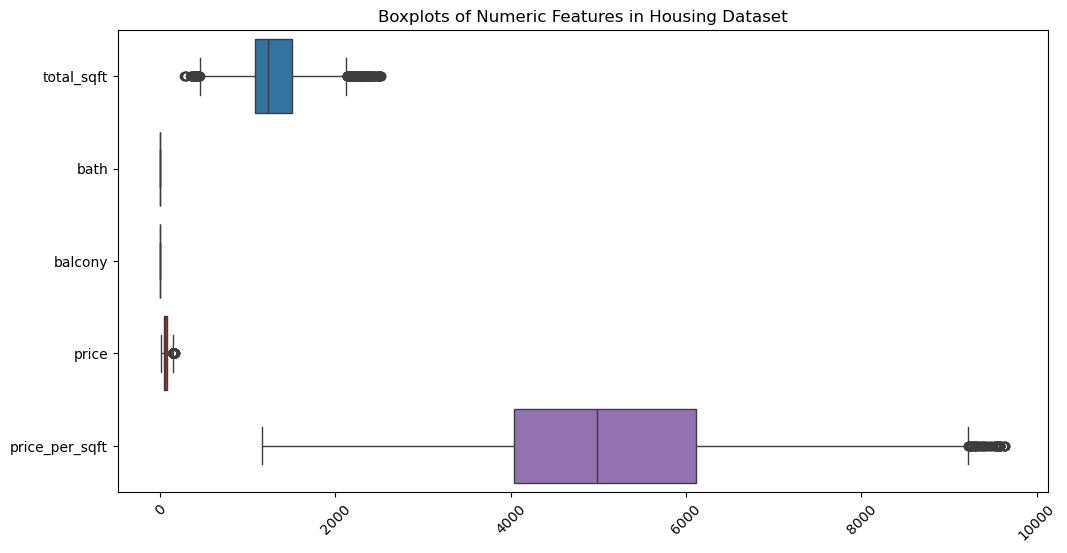

In [49]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=['number']),orient='h')
plt.title("Boxplots of Numeric Features in Housing Dataset")
plt.xticks(rotation=45)
plt.show()

In [50]:
def remove_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    ll = Q1 - 1.5*IQR
    ul = Q3 + 1.5*IQR
    return data[(data[column] >= ll) & (data[column] <= ul)]

for col in ['total_sqft', 'bath', 'price', 'price_per_sqft']:
    df = remove_outliers_iqr(df, col)

df.shape

(9512, 9)

In [51]:
X = df.drop(['price'], axis='columns')
y = df['price']

print("Features Shape:", X.shape)
print("Target Shape:", y.shape)

Features Shape: (9512, 8)
Target Shape: (9512,)


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7609, 8), (7609,), (1903, 8), (1903,))

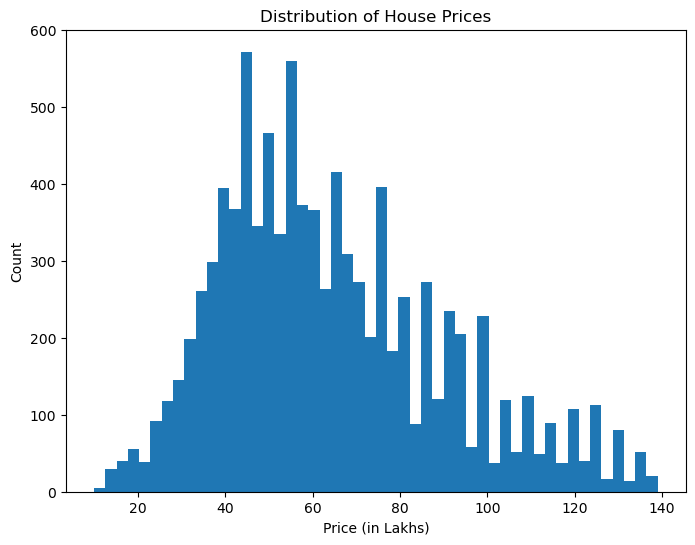

In [53]:
plt.figure(figsize=(8,6))
plt.hist(df['price'], bins=50)
plt.xlabel("Price (in Lakhs)")
plt.ylabel("Count")
plt.title("Distribution of House Prices")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_30244\3977406408.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_prices.index, y=location_prices.values, palette="viridis")


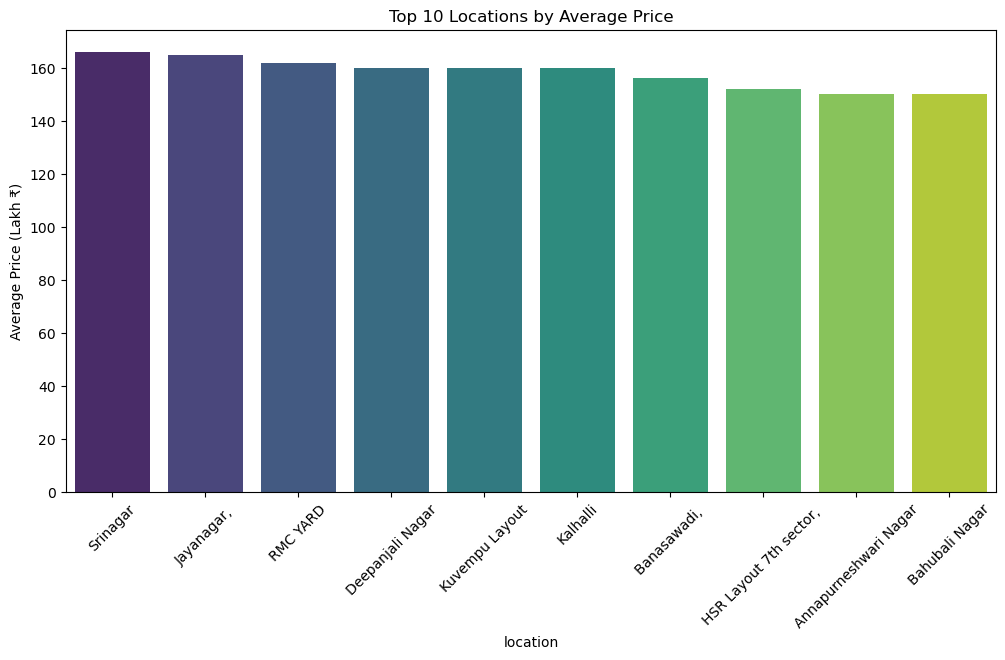

In [48]:
plt.figure(figsize=(12,6))
location_prices = df.groupby('location')['price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=location_prices.index, y=location_prices.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Locations by Average Price")
plt.ylabel("Average Price (Lakh ₹)")
plt.show()
